/kaggle/input/amazon-prime-movies-and-tv-shows/amazon_prime_titles.csv


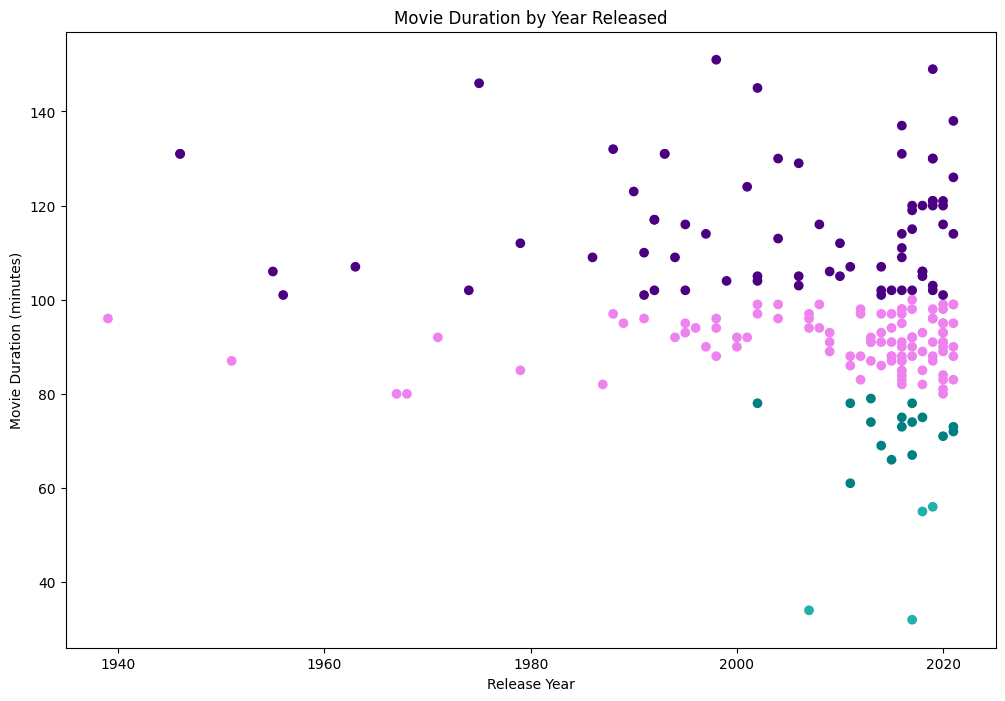

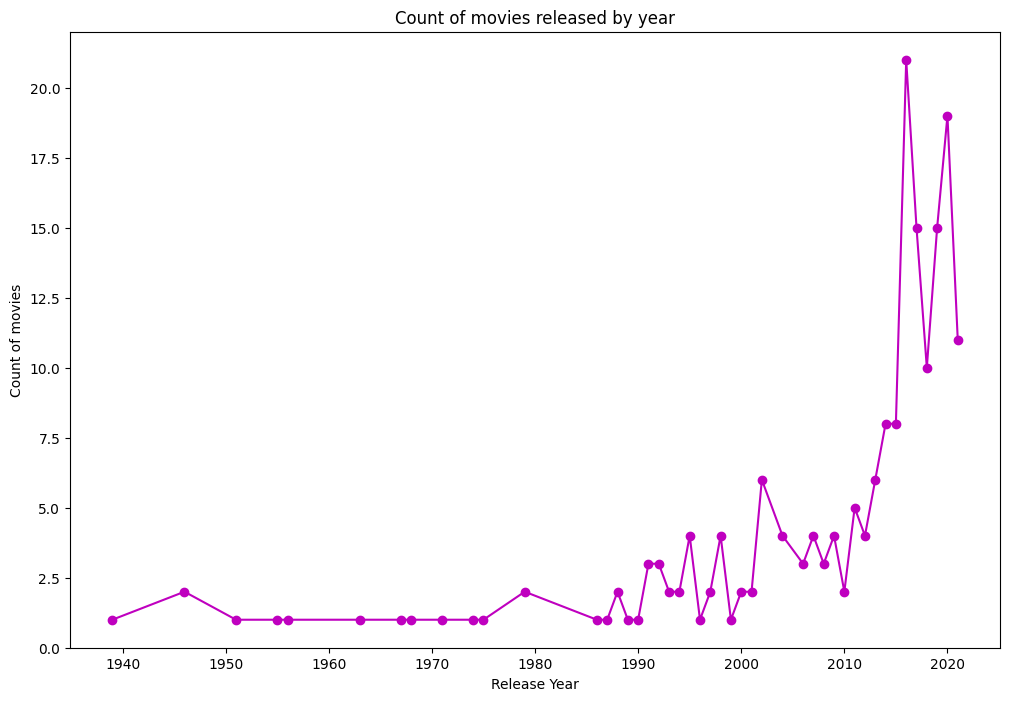

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Load the csv file
file = pd.read_csv("/kaggle/input/amazon-prime-movies-and-tv-shows/amazon_prime_titles.csv")

# convert into a DataFrame and exam the top 5 headers
prime_mov_tvshow = pd.DataFrame(file)

# subsetting to exclude TV shows
prime_movies = prime_mov_tvshow[prime_mov_tvshow["type"]=="Movie"]

# subsetting to find only us-based movies
us_movies = prime_movies[prime_movies["country"] == "United States"]

# iterating through the DF to add a new column "duration(min)" with an int value
# creating a new temp DF using .copy() method to avoid the warning caused by tempering with original DF
us_movies_temp = us_movies.copy()
us_movies_temp.loc[:, "duration(min)"] = us_movies_temp["duration"].apply(lambda x: str(x).split(" ")[0] if "min" in str(x) else None).astype(float)
    
# use only the required columns
us_movies_updated = us_movies_temp[["show_id", "type", "title", "director", "release_year", "duration(min)", "listed_in"]]

# count movies by release_year and convert into a dataframe instead of a series using reset_index()
us_movies_by_rel_yr = us_movies_updated.groupby(["release_year"])["show_id"].count().reset_index()

# Add colors to the plots by duration
colors = []
for lab,row in us_movies_updated.iterrows() :
    if row["duration(min)"] < 60 :
        colors.append("lightseagreen")
    elif 60 >= row["duration(min)"] <= 80 :    
        colors.append("green")
    elif 80 > row["duration(min)"] <= 100 :
        colors.append("teal")
    elif row["duration(min)"] > 100 :
        colors.append("indigo")
    else:
        colors.append("violet")

# set a figure state for first graph
fig_1 = plt.figure(figsize =(12, 8))

# plot the duration and release_year data frame to look at distribution
plt.scatter(us_movies_updated["release_year"],us_movies_updated["duration(min)"], c= colors)
plt.title("Movie Duration by Year Released")
plt.xlabel("Release Year")
plt.ylabel("Movie Duration (minutes)")
plt.show()

# set a figure state for first graph
fig = plt.figure(figsize =(12, 8))

# plot the the count of movies by year distribution 
plt.plot(us_movies_by_rel_yr["release_year"],us_movies_by_rel_yr["show_id"], linestyle='-', marker='o', color="m")
plt.xlabel("Release Year")
plt.ylabel("Count of movies")
plt.title("Count of movies released by year")
years_list = list(range(1940, 2022, 10))
plt.xticks(years_list)
plt.show()


